***Resale Transaction By Flat Type***

There are 87 rows in this dataset



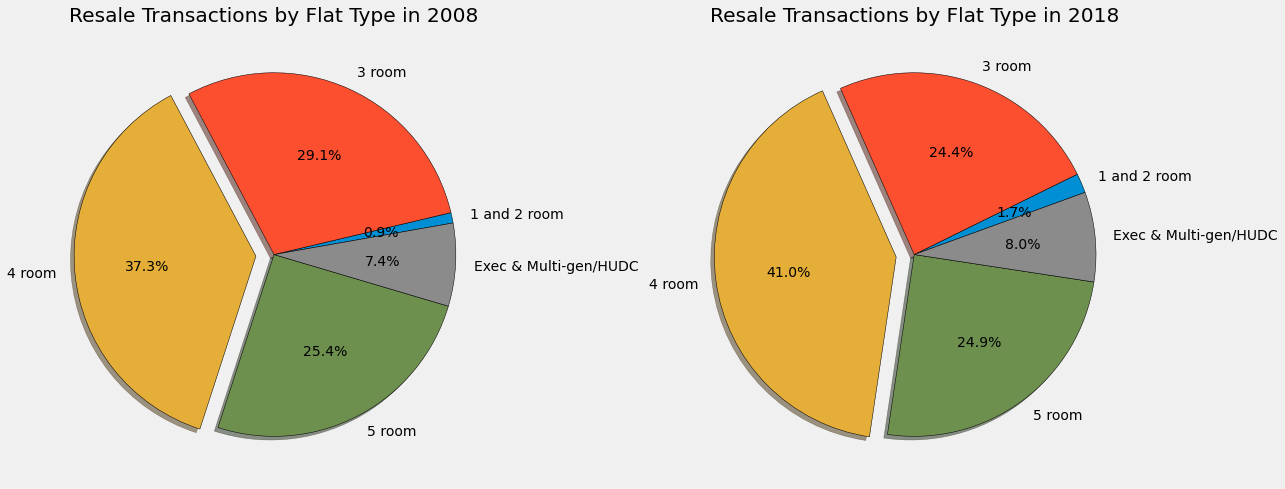

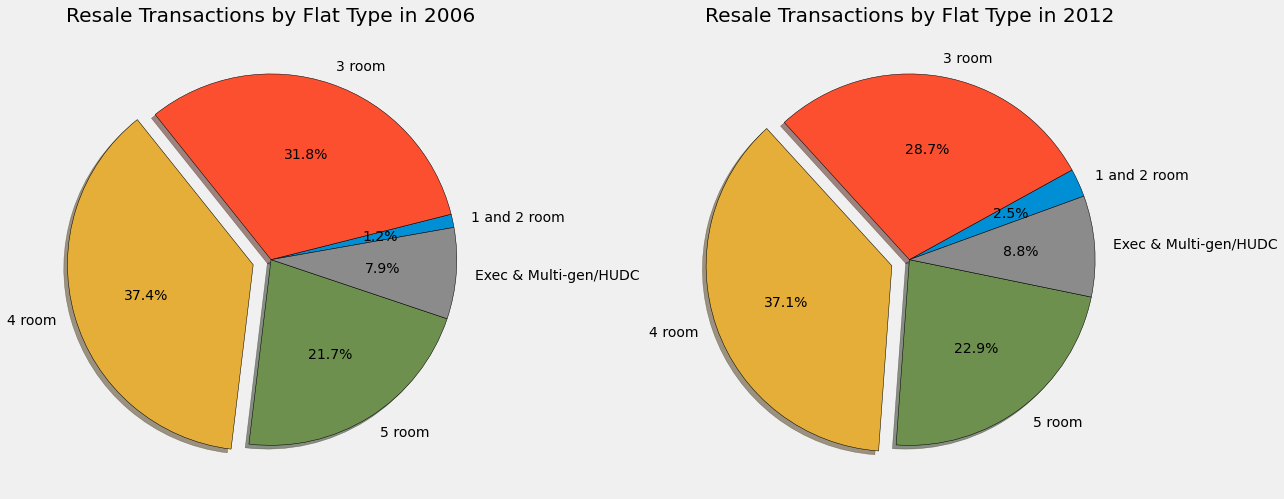

In [5]:
import numpy as np
import matplotlib.pyplot as plt

title = "Resale Transaction By Flat Type"
titlelen = len(title)
print("{:*^{titlelen}}".format(title, titlelen=titlelen+6))
print()

filename = 'datasets/resale-transaction-by-flat-type-based-on-registered-cases/resale-transactions-by-flat-type-based-on-registered-cases.csv'

df = np.genfromtxt(filename,
skip_header=1, dtype=[('financial_year','U10'), ('flat_type','U50'),('resale_transactions','i8')],
delimiter=",",
missing_values=['na','-'],filling_values=[0])

print("There are {} rows in this dataset".format(len(df)))
print()

def compare_pie(y1 = '2008' ,y2 = '2018'):
    #create mapping dictionary to make 1 room and 2 room under the same category, 
    #HUDC to be labelled with Exec and Multi-gen
    dict_map = {'1 room':"1 and 2 room",'2 room':"1 and 2 room",'3 room':'3 room',
                '4 room':'4 room','5 room':'5 room','Executive and Multi-generation':'Exec & Multi-gen/HUDC',
                'HUDC':'Exec & Multi-gen/HUDC'}
    #standardise the labels to be seen in the chart. Notice that index 2 is 4 room, which will be "exploded"
    labels = ['1 and 2 room','3 room','4 room','5 room','Exec & Multi-gen/HUDC']
    
    #conso function
    def conso (year): 
        x1 = df[df['financial_year']==year].copy() #selecting the df for the year
        flty_1 = list(x1['flat_type']) # create a list of all the flat types for the year
        flty_2 = [dict_map[x] for x in flty_1] #applying dict_map for standardisation 
        retr_1 = list(x1['resale_transactions']) # create a list of all the flat types for the year

        open_list_1 = [] # <- total resale transactions will be stored here 
        for t in range(len(labels)): #find the relevant index that matches the labels 
            range_index = [i for i, e in enumerate(flty_2) if e == labels[t] ]
            ans = 0 
            for x in range_index:   #loop to total the no. of transactions for the labels 
                ans += retr_1[x]
            open_list_1.append(ans)
        return (open_list_1) 
    
    year_1 = conso(y1) #use the arguments provided in the function to input into the conso function.
    year_2 = conso(y2) #this will fetch the total no. of transactions by the label type. 
    
    explode_ = [0, 0, 0.1, 0, 0] #always explode 4-room 
    
    plt.style.use("fivethirtyeight") #style 
    fig, ax = plt.subplots(1,2, figsize=(18, 15)) #used fig, ax to plot 2 pie charts side by side 

    ax[0].pie(year_1, labels=labels, explode=explode_, shadow=True,  
    startangle=10, autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'})
    ax[0].set_title("Resale Transactions by Flat Type in {}".format(y1))

    ax[1].pie(year_2, labels=labels, explode=explode_, shadow=True,
    startangle=20, autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'})
    ax[1].set_title("Resale Transactions by Flat Type in {}".format(y2))

    plt.tight_layout()
    plt.show()

#by default will return the pie charts for 2008 and 2018 
compare_pie()

#may input any two years from 2006 to 2018
compare_pie('2006','2012')